In [1]:
from Neuron_analysis_tool.Analyzer import Analyzer, long_pulse_protocol
from Neuron_analysis_tool.utils import video_player
from neuron import gui, h
import numpy as np
import os
import matplotlib.pyplot as plt
from copy import deepcopy
from pathlib import Path


NEURON mechanisms not found in /ems/elsc-labs/segev-i/yoni.leibner/PycharmProjects/Neuron_analysis_tool/Neuron_analysis_tool/x86_64/special.


NEURON: unable to open font "*helvetica-medium-r-normal*--14*", using "fixed"


## Loading rall model

In [2]:

analyser = Analyzer(type='Rall_tree')
colors_dict  = analyser.colors_dict
colors_dict['soma']='r'
colors_dict['basal']='pink'

analyser.change_color_dict(colors_dict)

## checking the rall model (its 0.25 lamdas for section and folow the d^3/2 diameter roll)

In [3]:
for sec in analyser.cell.all:
    lamda = ((1.0/sec.g_pas/sec.Ra) * (sec.diam/10000.0/4.0))**0.5 * 10000.0
    
    print('name:',sec, ', e_length:',round(sec.L/lamda, 3), ', diam:', sec.diam)

name: allen_model[0].soma[0] , e_length: 0.25 , diam: 9.999999999999996
name: allen_model[0].apic[0] , e_length: 0.25 , diam: 6.2996001243591335
name: allen_model[0].apic[1] , e_length: 0.25 , diam: 3.968600034713743
name: allen_model[0].apic[2] , e_length: 0.25 , diam: 2.5000000000000004
name: allen_model[0].apic[3] , e_length: 0.25 , diam: 1.5750000476837156
name: allen_model[0].apic[4] , e_length: 0.25 , diam: 1.5750000476837163
name: allen_model[0].apic[5] , e_length: 0.25 , diam: 2.4999999999999982
name: allen_model[0].apic[6] , e_length: 0.25 , diam: 1.5750000476837156
name: allen_model[0].apic[7] , e_length: 0.25 , diam: 1.5750000476837163
name: allen_model[0].apic[8] , e_length: 0.25 , diam: 3.9686000347137496
name: allen_model[0].apic[9] , e_length: 0.25 , diam: 2.5
name: allen_model[0].apic[10] , e_length: 0.25 , diam: 1.5750000476837156
name: allen_model[0].apic[11] , e_length: 0.25 , diam: 1.5750000476837163
name: allen_model[0].apic[12] , e_length: 0.25 , diam: 2.499999999

## plot the cell morphology

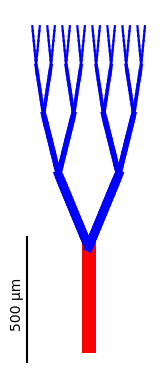

In [5]:
_,_,_ = analyser.plot_morph(scale=500, diam_factor=1)

## create a somaticentric view card 

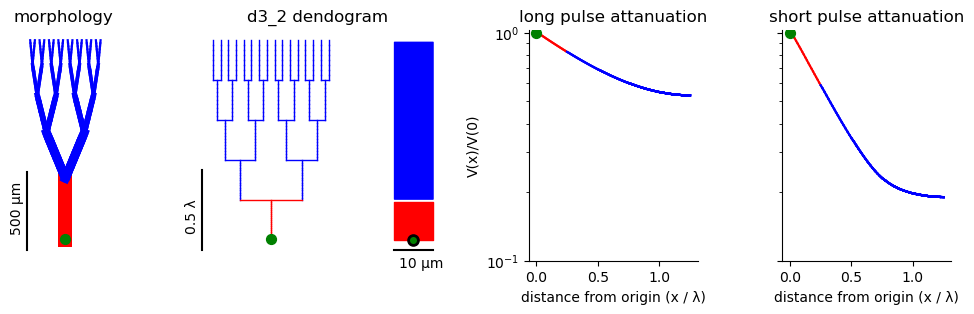

In [6]:
fig, ax = analyser.create_card(scale=500, start_seg=list(analyser.cell.soma[0])[0], diam_factor=1)

## create a spasific segment centric view card

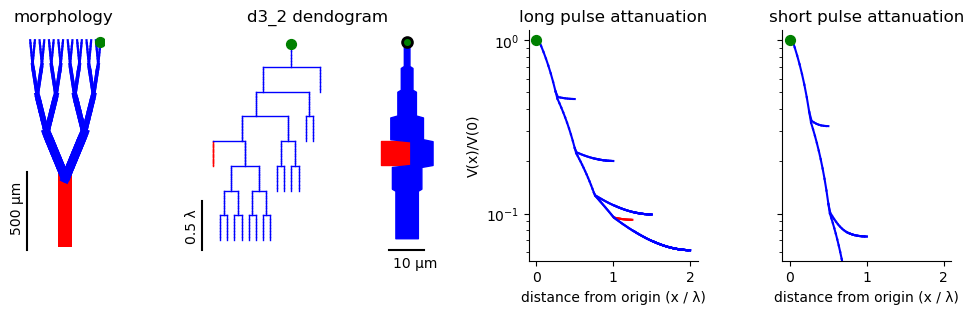

In [7]:
fig, ax = analyser.create_card(scale=500, start_seg=list(analyser.cell.apic[29])[-1], diam_factor=1)

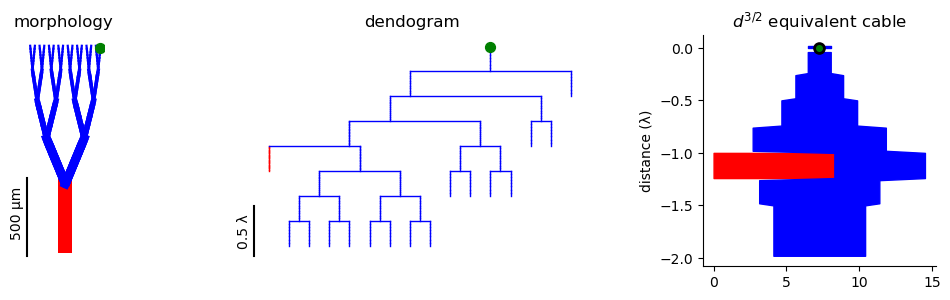

In [8]:
fig, ax = analyser.create_morpho_card(scale=500, start_seg=list(analyser.cell.apic[29])[-1], diam_factor=1)

## defining a seg value function and flot the result on the cell morphology

soma: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 9998.34it/s]
basal: 0it [00:00, ?it/s]
apical: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 292/292 [00:00<00:00, 10837.80it/s]
axon: 0it [00:00, ?it/s]
else: 0it [00:00, ?it/s]


Text(0, 0.5, 'Rin (MΩ)')

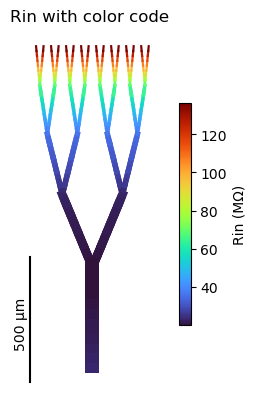

In [8]:

def Rin_func(seg):
    imp = h.Impedance(seg.x, sec=seg.sec)
    imp.loc(seg.x, sec=seg.sec)
    imp.compute(0, 1)
    return imp.input(seg.x, sec=seg.sec)

plt.title('Rin with color code')
ax, color_bar, colors, lines, segs = analyser.plot_morph_with_value_func(func = Rin_func, run_time=1000, theta=0, diam_factor=1, scale=500)
color_bar.set_ylabel('Rin (M\u03A9)')


Text(0.5, 1.0, 'Rin with color code')

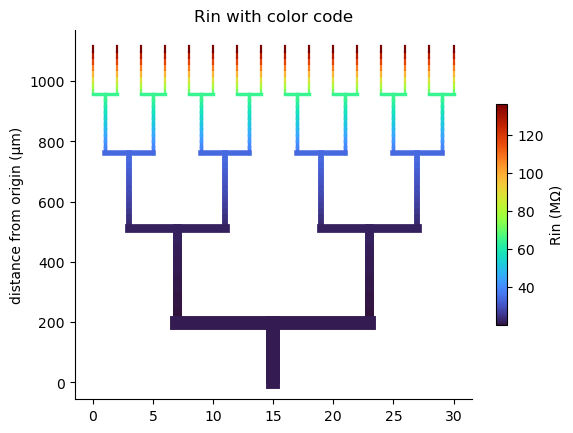

In [9]:
ax, x_pos, cax, colors, lines, segs = analyser.plot_dendogram_with_value_func(func = None, diam_factor=1, 
                                                                              colors=colors)
cax.set_ylabel('Rin (M\u03A9)')
ax.set_title('Rin with color code')

## ploting forward (red) and backward attenuation as in Rall & Rinzel 1973

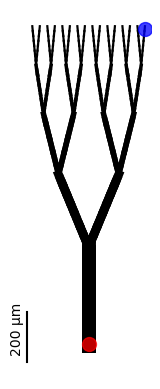

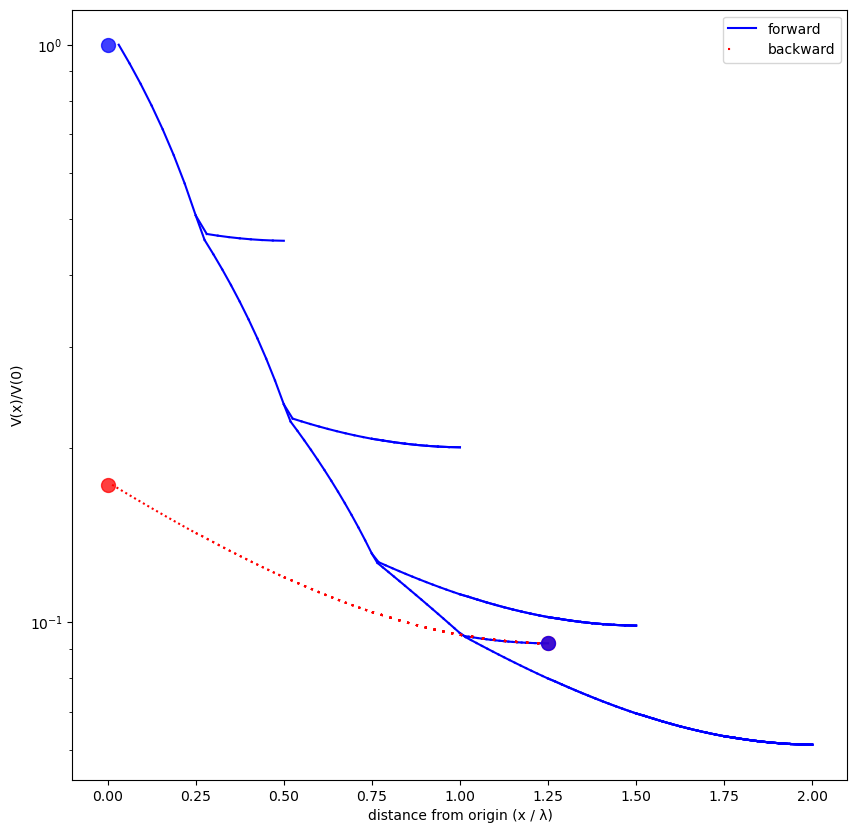

In [10]:
def legend_without_duplicate_labels(ax):
    handles, labels = ax.get_legend_handles_labels()
    unique = [(h, l) for i, (h, l) in enumerate(zip(handles, labels)) if l not in labels[:i]]
    ax.legend(*zip(*unique))

colors_dict = deepcopy(analyser.colors_dict)
plt.figure()
colors_dict1 = {key:'k' for key in colors_dict.keys()}
analyser.change_color_dict(colors_dict1)

seg_to_indicate_dict =dict()
seg_to_indicate_dict[list(analyser.cell.soma[0])[0]]=dict(size=100, color='r', alpha=0.75)
seg_to_indicate_dict[list(analyser.cell.apic[29])[-1]]=dict(size=100, color='b', alpha=0.75)
_,_,_=analyser.plot_morph(ax=plt.gca(), theta=0, seg_to_indicate_dict=seg_to_indicate_dict, scale=200, diam_factor=1)


fig, ax = plt.subplots(1, 1, figsize=(10, 10))
colors_dict2 = {key:'b' for key in colors_dict.keys()}
analyser.change_color_dict(colors_dict2)

ax, norm_by, lines, segs, attenuation_records = analyser.plot_attenuation(protocol=long_pulse_protocol, ax=ax, start_seg=list(analyser.cell.apic[29])[-1], seg_to_indicate_dict=seg_to_indicate_dict, label='forward')

colors_dict3 =  {key:'r' for key in colors_dict.keys()}
analyser.change_color_dict(colors_dict3)
ax, norm_by, lines, segs, attenuation_records = analyser.plot_attenuation(protocol=long_pulse_protocol, ax=ax, start_seg=list(analyser.cell.soma[0])[0], norm=True, norm_by=norm_by, seg_to_indicate_dict=seg_to_indicate_dict, ls='--', dashes=(1, 100), label='backward')
analyser.change_color_dict(colors_dict)

ax.legend()
legend_without_duplicate_labels(ax)


## creating a movie of voltage response to a somatic stimulated spikes

In [10]:
records, extra = analyser.record_protocol(cut_start_ms=1000.0, record_names=['v'])


duration= 30.998750000112775
Moviepy - Building video videos/rall_model/spiking_on_rall_tree.mp4.
Moviepy - Writing video videos/rall_model/spiking_on_rall_tree.mp4



Moviepy - Done !
Moviepy - video ready videos/rall_model/spiking_on_rall_tree.mp4


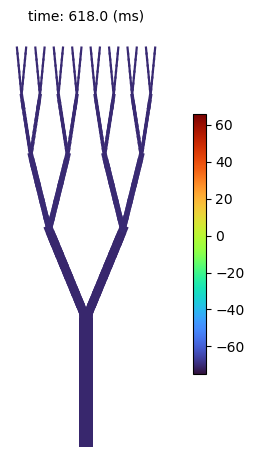

In [4]:
start_seg = list(analyser.cell.soma[0])[0]
fig = plt.figure()
ax = plt.gca()
slow_down_factor=50
plot_kwargs=[dict(ax=ax, seg = start_seg, 
                  records=records.all_records['v'], 
                  electrical=False, 
                  plot_type='morph', 
                  seg_to_indicate_dict=dict(),
                  plot_color_bar=True, 
                  theta=0,
                  diam_factor=1,)] 
f = lambda: plt.tight_layout()
videos_folder = 'videos/rall_model/'
video_name = 'spiking_on_rall_tree.mp4'
os.makedirs(videos_folder, exist_ok=True)
analyser.save_movie_from_rec(fig=fig, slow_down_factor=slow_down_factor, plot_kwargs=plot_kwargs, 
                             func_before_run=[f], save_to=videos_folder, clip_name=video_name, fps=10, 
                             threads=16, preset='ultrafast')

video_player(Path.cwd(), videos_folder+video_name)

morph: {'shrink': 0.6}
duration= 30.998750000112775
Moviepy - Building video videos/rall_model/spiking_on_rall_tree_with_attanuation.mp4.
Moviepy - Writing video videos/rall_model/spiking_on_rall_tree_with_attanuation.mp4



Moviepy - Done !
Moviepy - video ready videos/rall_model/spiking_on_rall_tree_with_attanuation.mp4


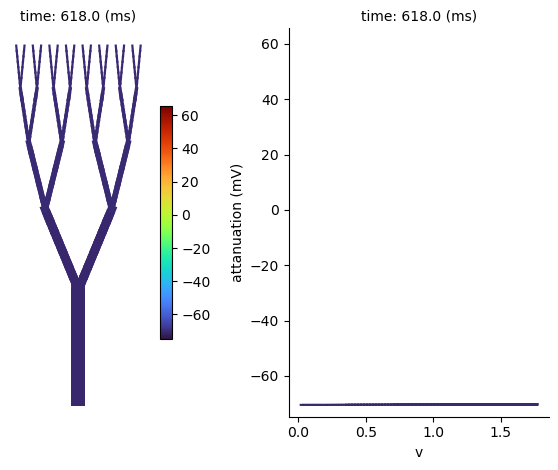

In [14]:
start_seg = list(analyser.cell.soma[0])[0]
fig, ax = plt.subplots(1,2)
slow_down_factor=50
plot_kwargs=[dict(ax=ax[0], seg = start_seg, 
                  records=records.all_records['v'], 
                  electrical=False, 
                  plot_type='morph', 
                  seg_to_indicate_dict=dict(),
                  plot_color_bar=True, 
                  theta=0,
                  diam_factor=1,)]

plot_kwargs.append(dict(ax=ax[1], seg = start_seg, records=records.all_records['v'], electrical=True, plot_type='attenuation'))
f = lambda: plt.tight_layout()

videos_folder = 'videos/rall_model/'
video_name = 'spiking_on_rall_tree_with_attanuation'
os.makedirs(videos_folder, exist_ok=True)
analyser.save_movie_from_rec(fig=fig, slow_down_factor=slow_down_factor, plot_kwargs=plot_kwargs,  f=[f],
                             save_to=videos_folder, clip_name=video_name, fps=10, 
                             threads=16, preset='ultrafast')

video_player(Path.cwd(), videos_folder+video_name+'.mp4')

duration= 30.998750000112775
Moviepy - Building video videos/rall_model/spiking_morph_dendogram_and_voltage.mp4.
Moviepy - Writing video videos/rall_model/spiking_morph_dendogram_and_voltage.mp4



Moviepy - Done !
Moviepy - video ready videos/rall_model/spiking_morph_dendogram_and_voltage.mp4


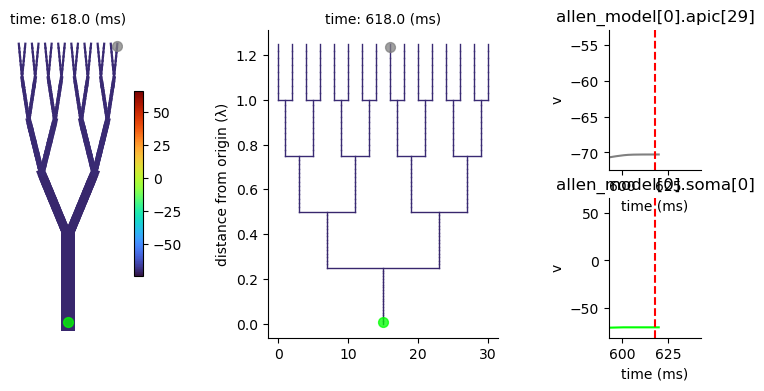

In [12]:
from matplotlib.gridspec import GridSpec
fig = plt.figure(constrained_layout=True, figsize=(10, 4))
gs = GridSpec(2, 3, figure=fig, width_ratios=[1, 1, 0.4])
ax_morph = fig.add_subplot(gs[:, 0])
ax_dendogram = fig.add_subplot(gs[:, 1])
ax_soma_voltage = fig.add_subplot(gs[1, 2])
ax_tip_voltage = fig.add_subplot(gs[0, 2])
f = lambda: plt.subplots_adjust(wspace=0.6)
f()
# plt.subplots_adjust(wspace=0)


seg_to_indicate_dict = dict()
seg_to_indicate_dict[list(analyser.cell.soma[0])[0]] = dict(label='soma', alpha=0.75, color='lime', size=50)
seg_to_indicate_dict[list(analyser.cell.apic[29])[-1]] = dict(label='tip', alpha=0.75, color='grey', size=50)

start_seg = list(analyser.cell.soma[0])[0]
slow_down_factor=50

plot_kwargs=[dict(ax=ax_morph, seg = start_seg, 
                  records=records.all_records['v'], 
                  electrical=False, 
                  plot_type='morph', 
                  seg_to_indicate_dict=seg_to_indicate_dict,
                  plot_color_bar=True, 
                  theta=0,
                  diam_factor=1,
                  color_bar_kwarts = dict(shrink=0.6, fraction=0.1))]

plot_kwargs.append(dict(ax=ax_dendogram, 
                        seg = start_seg, 
                        records=records.all_records['v'], 
                        electrical=True, 
                        plot_type='dendogram', 
                        seg_to_indicate_dict=seg_to_indicate_dict,
                        plot_color_bar=False, ))

plot_kwargs.append(dict(ax=ax_soma_voltage, 
                        seg = start_seg, 
                        records=records.all_records['v'], 
                        plot_type='single_record', color='lime'))
                   

plot_kwargs.append(dict(ax=ax_tip_voltage, 
                        seg = list(analyser.cell.apic[29])[-1], 
                        records=records.all_records['v'], 
                        plot_type='single_record', color='grey'))


videos_folder = 'videos/rall_model/'
video_name = 'spiking_morph_dendogram_and_voltage.mp4'
os.makedirs(videos_folder, exist_ok=True)
analyser.save_movie_from_rec(fig=fig, slow_down_factor=slow_down_factor, plot_kwargs=plot_kwargs, 
                             func_before_run=[f], save_to=videos_folder, clip_name=video_name, fps=10, 
                             threads=16, preset='ultrafast')

video_player(Path.cwd(), videos_folder+video_name)